In [3]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)

provider = IBMQ.load_account()

In [25]:
input1 = 1
input2 = 0

def single_qubit_superdense_coding(input1, input2):
    qc = QuantumCircuit(2, 2)

    #Eve entangles the 2 qubits. q[0] is sent to Alice, and q[1] is sent to Bob
    qc.h(0)
    qc.cx(0, 1)
    qc.barrier()

    #Alice modifies qubits according to the desired values
    if input1 == 1:
        qc.z(0)

    if input2 == 1:
        qc.x(0)

    qc.barrier()

    #Bob recieves Alice's qubit and retrieves the value of the 2 classical bits by means of measurement
    qc.cx(0, 1)
    qc.h(0)

    qc.measure(0, 0)
    qc.measure(1, 1)
    
    return qc

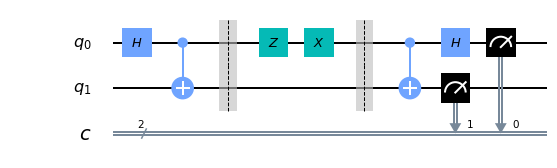

In [27]:
qc = single_qubit_superdense_coding(1, 1)
qc.draw()

In [28]:
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy

In [33]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and not b.configuration().simulator and b.status().operational==True))

In [34]:
backend

<IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>

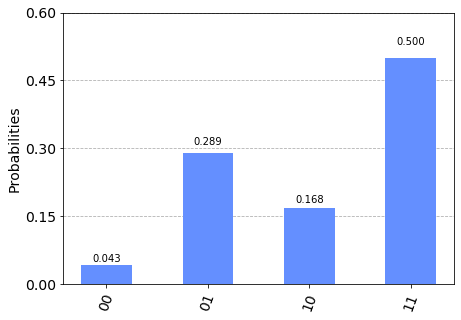

In [35]:
job = execute(qc, backend, shots=256)
count = job.result().get_counts()
plot_histogram(count)